In [41]:
!pip install boto3
! git clone https://github.com/huggingface/pytorch-pretrained-BigGAN
%cd pytorch-pretrained-BigGAN
!pwd
import torch
import nltk
nltk.download('wordnet')
from pytorch_pretrained_biggan import (BigGAN, one_hot_from_names, truncated_noise_sample,
                                       save_as_images)
from PIL import Image
from  torchvision.transforms.functional import to_pil_image as to_img
import matplotlib.pyplot as plt
plt.axis('off')
%matplotlib inline

Cloning into 'pytorch-pretrained-BigGAN'...
remote: Enumerating objects: 71, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 71 (delta 15), reused 15 (delta 15), pack-reused 51
Unpacking objects: 100% (71/71), done.
/content/pytorch-pretrained-BigGAN/pytorch-pretrained-BigGAN/pytorch-pretrained-BigGAN/pytorch-pretrained-BigGAN/pytorch-pretrained-BigGAN
/content/pytorch-pretrained-BigGAN/pytorch-pretrained-BigGAN/pytorch-pretrained-BigGAN/pytorch-pretrained-BigGAN/pytorch-pretrained-BigGAN
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


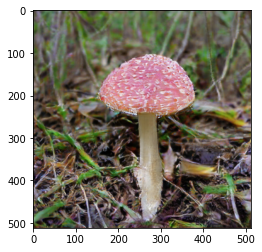

In [52]:
model = BigGAN.from_pretrained('biggan-deep-512')

# Prepare a input
truncation = 0.4
class_vector = torch.from_numpy(one_hot_from_names(['soap bubble', 'coffee', 'mushroom'], batch_size=3))
noise_vector = torch.from_numpy(truncated_noise_sample(truncation=truncation, batch_size=3))
noise_vector, class_vector, model = [x.to('cuda') for x in [noise_vector, class_vector, model]]

# Generate an image
with torch.no_grad():
    output = model(noise_vector, class_vector, truncation)
output = (output + 1) / 2
plt.imshow(output[2].permute(1, 2, 0).detach().cpu().numpy())